# 案例需求

按照品牌种类，统计py_excel文件中所有excel的销售额，并按照销售额大小倒序排列。其中，销售额 = 访客数 x 转化率 x 客单价。
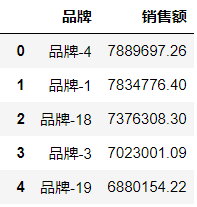

# OS模块

os模块提供了多数操作系统的功能接口函数。当os模块被导入后，它会自适应于不同的操作系统平台，根据不同的平台进行相应的操作，在python自动化处理excel时，经常和文件、目录打交道，这时就离不了os模块，本节内容将对os模块常用函数进行详细的解读。

In [2]:
import os

## os.name

name顾名思义就是'名字'，这里的名字是指操作系统的名字，主要作用是判断目前正在使用的平台，并给出操作系统的名字，如Windows返回 'nt'; Linux 返回'posix'。注意该命令不带括号。

In [3]:
os.name

'posix'

## os.getcwd()

全称应该是'get current work directory'，获取当前工作的目录。注意该命令带括号，除了第一个命令不带括号之外，以下命令基本都带括号。

In [3]:
os.getcwd()

'D:\\python课程\\项目\\自动化处理excel'

## os.listdir(path)

列出path目录下所有的文件和目录名。Path参数可以省略(省略的话默认为当前目录)。以列表的形式全部列举出来，其中没有区分目录和文件。

In [4]:
os.listdir()

['.ipynb_checkpoints', 'py_excel', 'test', 'test.xlsx', '自动化处理excel.ipynb']

In [5]:
path="D:\\python课程\\项目\\自动化处理excel\\py_excel"
os.listdir(path)

['专项户外运动装备&冰爪.xlsx',
 '专项户外运动装备&呼吸管-呼吸器.xlsx',
 '专项户外运动装备&安全带.xlsx',
 '专项户外运动装备&救生衣.xlsx',
 '专项户外运动装备&气瓶.xlsx',
 '专项户外运动装备&滑雪头盔.xlsx']

## os.remove(path)

删除path指定的文件，该参数不能省略。

In [7]:
path="D:\\python课程\\项目\\自动化处理excel\\test.xlsx"
os.remove(path)

In [8]:
os.listdir()#test.xlsx文件已删除

['.ipynb_checkpoints', 'py_excel', 'test', '自动化处理excel.ipynb']

## os.rmdir(path)

删除path指定的目录，该参数不能省略。

In [9]:
path="D:\\python课程\\项目\\自动化处理excel\\test"
os.rmdir(path)

In [10]:
os.listdir()#test目录已删除

['.ipynb_checkpoints', 'py_excel', '自动化处理excel.ipynb']

##  os.mkdir(path)

创建path指定的目录，该参数不能省略。注意：这样只能建立一层，要想递归建立可用：os.makedirs()。

In [13]:
path="D:\\python课程\\项目\\自动化处理excel\\test"
os.mkdir(path)
os.listdir()#test目录已创建

['.ipynb_checkpoints', 'py_excel', 'test', '自动化处理excel.ipynb']

In [14]:
path="D:\\python课程\\项目\\自动化处理excel\\test1\\test2"
os.mkdir(path)#因为test1目录不存在，因此需要os.makedirs()递归建立

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'D:\\python课程\\项目\\自动化处理excel\\test1\\test2'

In [15]:
path="D:\\python课程\\项目\\自动化处理excel\\test1\\test2"
os.makedirs(path)
os.listdir()#test1目录已创建

['.ipynb_checkpoints', 'py_excel', 'test', 'test1', '自动化处理excel.ipynb']

In [16]:
os.listdir("D:\\python课程\\项目\\自动化处理excel\\test1")#test2目录已创建

['test2']

## os.path.isfile(path)

判断指定对象是否为文件。是返回True,否则False。

In [17]:
os.path.isfile('test')

False

In [18]:
os.path.isfile('自动化处理excel.ipynb')

True

## os.path.isdir(path)

判断指定对象是否为目录。是True,否则False。

In [19]:
os.path.isdir('test')

True

In [20]:
os.path.isdir('自动化处理excel.ipynb')

False

## os.path.exists(path)

检验指定的对象是否存在。是True,否则False。

In [21]:
os.path.exists('test')

True

In [22]:
os.path.exists('test3')

False

## os.path.split(path)

返回路径的目录和文件名，即将目录和文件名分开，而不是一个整体。此处只是把前后两部分分开而已。就是找最后一个'/'。

In [24]:
os.path.split('D:\\python课程\\项目\\自动化处理excel\\自动化处理excel.ipynb')

('D:\\python课程\\项目\\自动化处理excel', '自动化处理excel.ipynb')

## os.chdir(path)

'change dir'改变目录到指定目录。

In [28]:
os.getcwd()

'D:\\python课程\\项目\\自动化处理excel'

In [29]:
os.chdir("D:\\python课程\\项目\\自动化处理excel\\py_excel")
os.getcwd()

'D:\\python课程\\项目\\自动化处理excel\\py_excel'

# 单个表统计销售额

In [30]:
import os
import pandas as pd

path="D:\\python课程\\项目\\自动化处理excel\\py_excel"
os.chdir(path)#指定路径到存放excel的目录
name='专项户外运动装备&安全带.xlsx'#需要读取的excel名
data=pd.read_excel(name)
data.head()

,日期,转化率,访客数,三级类目,客单价,品牌
0,2019-08,0.104957,30225,安全带,123.275654,品牌-10
1,2019-08,0.052431,40765,安全带,174.793849,品牌-2
2,2019-08,0.079985,33015,安全带,117.725921,品牌-9
3,2019-08,0.062381,16647,安全带,208.560443,品牌-11
4,2019-08,0.022006,9424,安全带,968.965343,品牌-18


In [31]:
#计算销售额
data["销售额"] = data["转化率"] * data["访客数"] * data["客单价"]
data.head()

,日期,转化率,访客数,三级类目,客单价,品牌,销售额
0,2019-08,0.104957,30225,安全带,123.275654,品牌-10,391069.561859
1,2019-08,0.052431,40765,安全带,174.793849,品牌-2,373592.297539
2,2019-08,0.079985,33015,安全带,117.725921,品牌-9,310880.469714
3,2019-08,0.062381,16647,安全带,208.560443,品牌-11,216580.463155
4,2019-08,0.022006,9424,安全带,968.965343,品牌-18,200944.035662


In [32]:
#按照品牌进行分组，并对销售额求和
data_sum = data.groupby("品牌")["销售额"].sum().reset_index()
data_sum

,品牌,销售额
0,品牌-1,2.085333e+06
1,品牌-10,1.820282e+06
2,品牌-11,1.534714e+06
3,品牌-12,9.362469e+05
4,品牌-13,1.626291e+06
5,品牌-14,1.369427e+06
6,品牌-15,1.255952e+06
7,品牌-16,1.087956e+06
8,品牌-17,1.436410e+06
9,品牌-18,1.280775e+06


# 统计所有表的销售额

In [44]:
import os 
import pandas as pd
import time

start_time = time.time()
result = pd.DataFrame()
path="D:\python课程\项目\自动化处理excel\py_excel"

#循环遍历表格结果
for name in os.listdir(path):
    df = pd.read_excel(path+'\\'+name)
    df["销售额"] = df["访客数"] * df["转化率"] * df["客单价"]
    df_sum = df.groupby("品牌")["销售额"].sum().reset_index()
    result = pd.concat([result,df_sum])
    
final = result.groupby("品牌")["销售额"].sum().reset_index().sort_values("销售额",ascending=False)
pd.set_option("display.float_format",lambda x: "%.2f" %x)#float类型数据保留两位小数
final.to_excel(r'D:\python课程\项目\自动化处理excel\result.xlsx',index=False)

end_time = time.time()
during_time = end_time - start_time
print('总计算时间：{}'.format(during_time))

总计算时间：0.24178266525268555


In [45]:
final

,品牌,销售额
14,品牌-4,7889697.26
0,品牌-1,7834776.40
9,品牌-18,7376308.30
13,品牌-3,7023001.09
10,品牌-19,6880154.22
6,品牌-15,6495826.63
17,品牌-7,6436456.31
4,品牌-13,6391561.70
12,品牌-20,6294270.21
1,品牌-10,6116006.38
